# Time Series Analysis for Q4
Tutorial: https://colab.research.google.com/drive/1h7okvRLHCbIGocdHy_jfLdgPN2vOi9CV?usp=sharing

In [1883]:
import pandas as pd
import numpy as np
from bottleneck import nanargmax
from matplotlib import pyplot as plt

In [1884]:
df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)
df_wind.head()

/tmp/ipykernel_37165/3030181279.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)


,0,1,2,3,4
0,"# Renewables.ninja Wind (current total fleet, ...",NaN,NaN,NaN,NaN
1,# Units: time in UTC; other columns are capaci...,NaN,NaN,NaN,NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN,NaN,NaN,NaN
3,time,NATIONAL,IE04,IE05,IE06
4,1980-01-01 00:00:00+00:00,0.145697,0.056425,0.224918,0.042835


In [1885]:
for i in range(3):
    print(df_wind.iloc[i, 0])
    print("\n")

# Renewables.ninja Wind (current total fleet, country zones, hourly, 1980 - 2024)  -  Ireland  -  ninja_wind_countryzones_hourly_IE_current-total_merra2.csv  -  Version 1.4  -  License: https://creativecommons.org/licenses/by-nc/4.0/  -  Reference: https://doi.org/10.1016/j.energy.2016.08.068


# Units: time in UTC; other columns are capacity factors [0-1].  Column names signify country ISO2 code or NUTS2 code.  Simulation represents 4965 MW of capacity.  Bias corrected using national generation data.


# {'units': {'time': 'UTC', 'NATIONAL': 'bias-corrected capacity factor [0-1]', 'IE04': 'bias-corrected capacity factor [0-1]', 'IE05': 'bias-corrected capacity factor [0-1]', 'IE06': 'bias-corrected capacity factor [0-1]'}, 'country': 'Ireland', 'filename': 'ninja_wind_countryzones_hourly_IE_current-total_merra2.csv', 'version': '1.4', 'license': 'https://creativecommons.org/licenses/by-nc/4.0/', 'reference': 'https://doi.org/10.1016/j.energy.2016.08.068'}




In [1886]:
w_capacity = 4000 # used to go from normalized values to absolute values

df_wind = df_wind.iloc[4:, :]
df_wind.head()
col = ['time wind', 'power wind', 'IE04', 'IE05', 'IE06']
df_wind.columns = col

In [1887]:
df_wind.tail()

,time wind,power wind,IE04,IE05,IE06
394487,2024-12-31 19:00:00+00:00,0.566249,0.684685,0.468164,0.649192
394488,2024-12-31 20:00:00+00:00,0.506534,0.665317,0.374993,0.618031
394489,2024-12-31 21:00:00+00:00,0.476798,0.64879,0.33732,0.574653
394490,2024-12-31 22:00:00+00:00,0.460486,0.642585,0.315573,0.542981
394491,2024-12-31 23:00:00+00:00,0.424961,0.620224,0.273166,0.486031


In [1888]:
df_wind24 = df_wind.iloc[-(366*24):, 0:2]
df_wind24['power wind'] = df_wind24['power wind'].astype('float') * w_capacity
df_wind24.head()

,time wind,power wind
385708,2024-01-01 00:00:00+00:00,2226.376
385709,2024-01-01 01:00:00+00:00,2028.340
385710,2024-01-01 02:00:00+00:00,1802.656
385711,2024-01-01 03:00:00+00:00,1587.272
385712,2024-01-01 04:00:00+00:00,1434.276


In [1889]:
wind_recordings = np.array(df_wind24['power wind'].astype('float').tolist())

print(max(wind_recordings))
print(min(wind_recordings))
print(np.mean(wind_recordings))
print(len(wind_recordings))


3924.044
8.092
1198.830454007286
8784


In [1890]:
a = 3*24 #moving average wondow size
N = len(wind_recordings)
mvavg_wind24 = np.zeros(len(wind_recordings))
for i in range(a, N):
    mvavg_wind24[i] = sum(wind_recordings[i-a: i]) / a

print(max(mvavg_wind24[a:]))
print(min(mvavg_wind24[a:]))
print(np.mean(mvavg_wind24[a:]))

3282.7031666666658
129.67355555555557
1191.3151969952046


Maximum recorded wind power 3924.044 0.981011
Minimum recorded wind power: 8.092 0.002023
Mean wind power: 1198.830454007286 0.2997076135018215

Maximum moving average wind power: 3282.7031666666658 0.8206757916666665
Minimum moving average wind power: 129.67355555555557 0.03241838888888889
Mean moving average wind power: 1191.3151969952046 0.2978287992488011


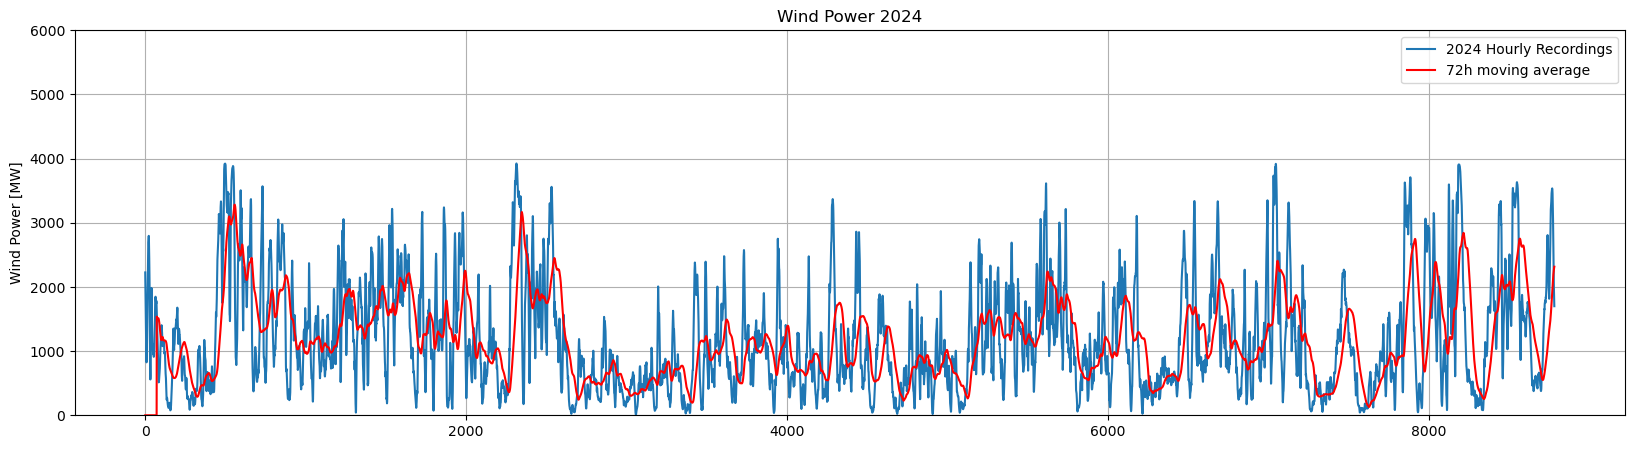

In [1891]:
plt.figure(figsize=(20, 5))
plt.title('Wind Power 2024')
plt.plot(wind_recordings)
plt.plot(mvavg_wind24, color='red')
plt.legend(['2024 Hourly Recordings', '72h moving average'])
plt.grid(True)
plt.ylabel('Wind Power [MW]')
plt.ylim([0, 6000])
plt.savefig("wind-power.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

print("Maximum recorded wind power", max(wind_recordings), max(wind_recordings) / w_capacity)
print("Minimum recorded wind power:", min(wind_recordings), min(wind_recordings) / w_capacity )
print("Mean wind power:", np.mean(wind_recordings), np.mean(wind_recordings) / w_capacity )

print("\nMaximum moving average wind power:", max(mvavg_wind24[a:]), max(mvavg_wind24[a:]) / w_capacity)
print("Minimum moving average wind power:", min(mvavg_wind24[a:]), min(mvavg_wind24[a:]) / w_capacity )
print("Mean moving average wind power:", np.mean(mvavg_wind24[a:]),np.mean(mvavg_wind24[a:]) / w_capacity)


# Solar

In [1894]:
df_pv = pd.read_csv("ninja-pv-country-ES-national-merra2.csv", comment='#', header=None)
df_pv.head()

/tmp/ipykernel_37165/3181467354.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pv = pd.read_csv("ninja-pv-country-ES-national-merra2.csv", comment='#', header=None)


,0,1
0,"# Renewables.ninja pv (country zones, hourly, ...",NaN
1,"# Units: time in UTC, other columns are bias-c...",NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN
3,time,NATIONAL
4,1980-01-01 00:00:00+00:00,0.000000


In [1747]:
for i in range(3):
    print(df_pv.iloc[i, 0])
    print("\n")

# Renewables.ninja pv (country zones, hourly, 1980 - 2024) - ES - ninja-pv-countryzones-ES-hourly-merra2.csv.gz - Version: 1.4 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2016.08.060


# Units: time in UTC, other columns are bias-corrected capacity factors [0-1].


# {'units': {'time': 'UTC', 'NATIONAL': 'bias-corrected capacity factor [0-1]'}, 'country': 'ES', 'filename': 'ninja-pv-countryzones-ES-hourly-merra2.csv.gz', 'version': '1.4', 'license': 'https://creativecommons.org/licenses/by-nc/4.0/', 'reference': 'https://doi.org/10.1016/j.energy.2016.08.060'}




In [1748]:
pv_capacity = 2000
pv_header = ['time pv', 'power pv']
df_pv.columns = pv_header
df_pv = df_pv.iloc[-366*24:, :]
df_pv['power pv'] = df_pv['power pv'] * pv_capacity
df_pv.head()

,time pv,power pv
385708,2024-01-01 00:00:00+00:00,0.0
385709,2024-01-01 01:00:00+00:00,0.0
385710,2024-01-01 02:00:00+00:00,0.0
385711,2024-01-01 03:00:00+00:00,0.0
385712,2024-01-01 04:00:00+00:00,0.0


Maximum recorded pv power 1486.0 0.743
Mean Hourly pv power 333.1700819672131 0.16658504098360655
Minimum recorded pv power: 0.0 0.0
Maximum 72h moving average pv power 492.72222222222223 0.24636111111111111
Mean 72h moving average pv power 334.18185644322006 0.16709092822161004
Minimum 72h moving average pv power 105.13888888888889 0.05256944444444444


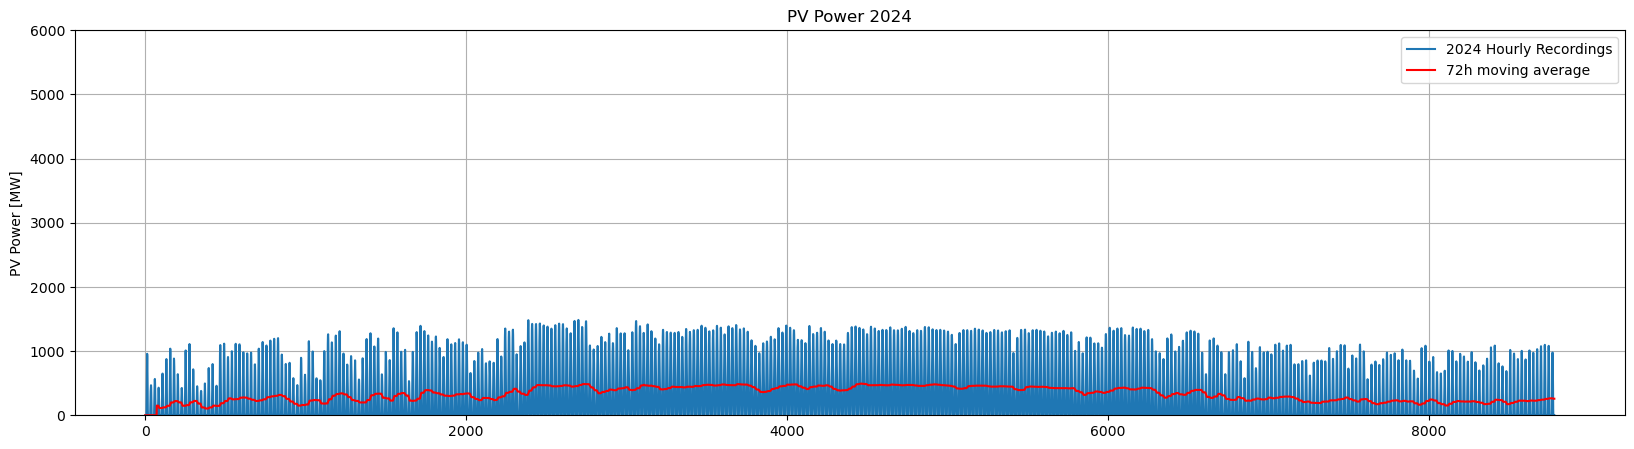

In [1749]:
pv_power = np.array(df_pv['power pv'].astype('float').tolist())
mvavg_pv = np.zeros(len(pv_power))
for i in range(a, len(pv_power)):
    mvavg_pv[i] = sum(pv_power[i-a: i]) / a

plt.figure(figsize=(20, 5))
plt.plot(pv_power)
plt.plot(mvavg_pv, color='red')
plt.legend(['2024 Hourly Recordings', '72h moving average'])
plt.title('PV Power 2024')
plt.ylabel('PV Power [MW]')
plt.ylim([0, 6000])
plt.grid(True)
plt.savefig("pv-power.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

print("Maximum recorded pv power", max(pv_power), max(pv_power) / pv_capacity)
print("Mean Hourly pv power", np.mean(pv_power), np.mean(pv_power) / pv_capacity)
print("Minimum recorded pv power:", min(pv_power), min(pv_power) / pv_capacity)

print("Maximum 72h moving average pv power", max(mvavg_pv[a:]), max(mvavg_pv[a:]) / pv_capacity)
print("Mean 72h moving average pv power", np.mean(mvavg_pv[a:]), np.mean(mvavg_pv[a:]) / pv_capacity)
print("Minimum 72h moving average pv power", min(mvavg_pv[a:]), min(mvavg_pv[a:]) / pv_capacity)

# Demand

In [1750]:
df_demand = pd.read_csv("GUI_TOTAL_LOAD_DAYAHEAD_202312312300-202412312300.csv")
df_demand

,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW)
0,01/01/2024 00:00 - 01/01/2024 00:30,Ireland (IE),3500.51,3678.0
1,01/01/2024 00:30 - 01/01/2024 01:00,Ireland (IE),3533.43,3613.0
2,01/01/2024 01:00 - 01/01/2024 01:30,Ireland (IE),3459.59,3828.0
3,01/01/2024 01:30 - 01/01/2024 02:00,Ireland (IE),3416.14,3828.0
4,01/01/2024 02:00 - 01/01/2024 02:30,Ireland (IE),3333.59,3769.0
...,...,...,...,...
17563,31/12/2024 21:30 - 31/12/2024 22:00,Ireland (IE),3984.61,4671.0
17564,31/12/2024 22:00 - 31/12/2024 22:30,Ireland (IE),3874.34,4530.0
17565,31/12/2024 22:30 - 31/12/2024 23:00,Ireland (IE),3789.38,4388.0
17566,31/12/2024 23:00 - 31/12/2024 23:30,Ireland (IE),3706.46,4233.0


In [1752]:
df_demand['time demand'] = pd.to_datetime(df_demand['time demand'], format='%d/%m/%Y %H:%M')

# Remove any half hourly time stamps
idx_minute = []

for i in range(len(df_demand)):
    if df_demand['time demand'][i].minute == 0:
        idx_minute.append(i)

df_demand = df_demand.iloc[idx_minute]
df_demand.head()

/tmp/ipykernel_37165/279827043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand['time demand'] = pd.to_datetime(df_demand['time demand'], format='%d/%m/%Y %H:%M')


,time demand,demand
0,2024-01-01 00:00:00,3500.51
2,2024-01-01 01:00:00,3459.59
4,2024-01-01 02:00:00,3333.59
6,2024-01-01 03:00:00,3181.32
8,2024-01-01 04:00:00,3079.68


In [1753]:
len(df_demand)

8784

In [1754]:
print("Max demand:", max(df_demand['demand'].astype('float')))

Max demand: 5670.67


In [1755]:
demand = np.array(df_demand['demand'].astype('float').tolist()) * (6000 / 5670.67)

In [1756]:
mvavg_demand = np.zeros(N)
a = 24

# There are some nan values in this dataset, I had to account for that when calculating the average
for i in range(a, N):
    x = sum(np.isnan(demand[i-a:i]))
    mvavg_demand[i] = np.nansum(demand[i-a:i]) / (a - x)

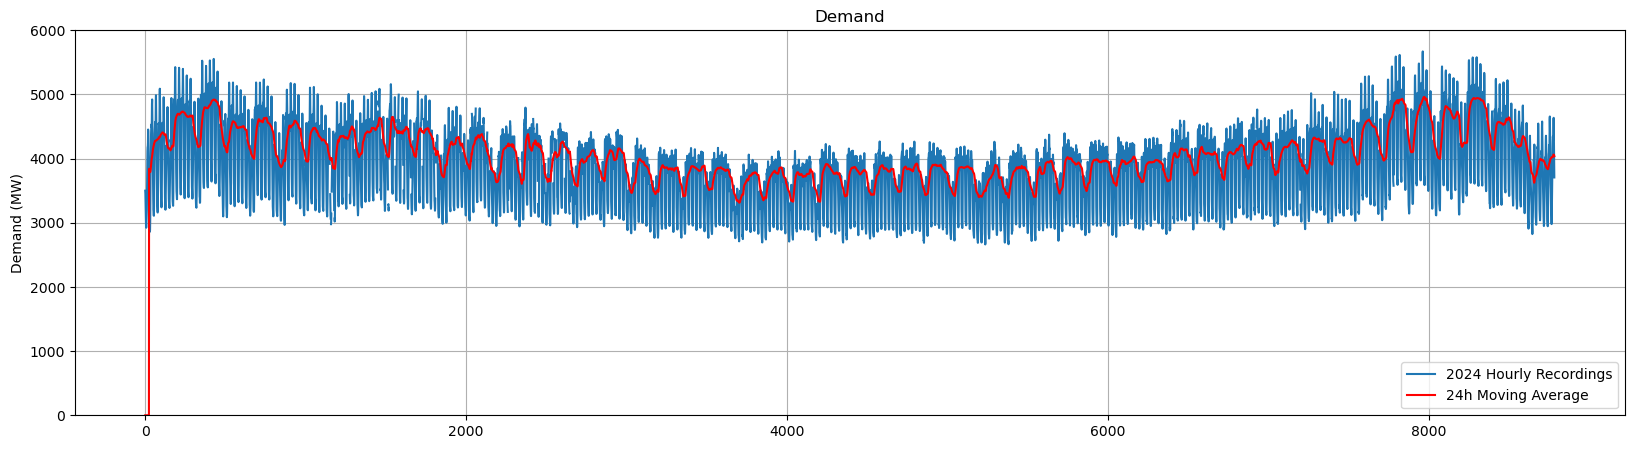

In [1896]:
plt.figure(figsize=(20, 5))
plt.plot(demand)
plt.plot(mvavg_demand, color='red')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.title('Demand')
plt.legend(['2024 Hourly Recordings', '24h Moving Average'])
plt.ylim([0, 6000])
plt.savefig("demand.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

In [1758]:
print("Maximum demand", max(demand), max(demand) / 6000)
print("Mean demand", np.nansum(demand) / len(demand), np.nansum(demand) / len(demand) / 6000)
print("Minimum demand", min(demand), min(demand) / 6000)

print("\nMaximum 24h Moving average demand", max(mvavg_demand[a:]), max(mvavg_demand[a:]) / 6000)
print("Mean 24h Moving average demand", np.nansum(mvavg_demand[a:]) / len(mvavg_demand[a:]), np.nansum(mvavg_demand[a:]) / len(mvavg_demand[a:]) / 6000)
print("Minimum 24h Moving Average Demand", min(mvavg_demand[a:]), min(mvavg_demand[a:]) / 6000)

Maximum demand 6000.0 1.0
Mean demand 4020.1151479666805 0.6700191913277801
Minimum demand 2817.275560030825 0.46954592667180417

Maximum 24h Moving average demand 4961.161996730545 0.8268603327884242
Mean 24h Moving average demand 4052.064647142391 0.6753441078570652
Minimum 24h Moving Average Demand 3313.5643583562437 0.5522607263927073


# Residual demand
Demand after the production from wind and solar has been subtracted

In [1759]:

df_demand

,time demand,demand
0,2024-01-01 00:00:00,3500.51
2,2024-01-01 01:00:00,3459.59
4,2024-01-01 02:00:00,3333.59
6,2024-01-01 03:00:00,3181.32
8,2024-01-01 04:00:00,3079.68
...,...,...
17558,2024-12-31 19:00:00,4635.74
17560,2024-12-31 20:00:00,4406.22
17562,2024-12-31 21:00:00,4131.93
17564,2024-12-31 22:00:00,3874.34


In [1760]:
df_pv.columns = ['time pv', 'pv power']
df_pv['time pv'] = df_pv['time pv'].str.slice(stop=16)
df_pv['time pv'] = pd.to_datetime(df_pv['time pv'], format='%Y-%m-%d %H:%M')
df_pv

,time pv,pv power
385708,2024-01-01 00:00:00,0.0
385709,2024-01-01 01:00:00,0.0
385710,2024-01-01 02:00:00,0.0
385711,2024-01-01 03:00:00,0.0
385712,2024-01-01 04:00:00,0.0
...,...,...
394487,2024-12-31 19:00:00,0.0
394488,2024-12-31 20:00:00,0.0
394489,2024-12-31 21:00:00,0.0
394490,2024-12-31 22:00:00,0.0


In [1761]:
df_wind24.columns = ['time wind', 'wind power']
df_wind24['time wind'] = df_wind24['time wind'].str.slice(stop=16)
df_wind24['time wind'] = pd.to_datetime(df_wind24['time wind'], format='%Y-%m-%d %H:%M')
df_wind24

,time wind,wind power
385708,2024-01-01 00:00:00,2226.376
385709,2024-01-01 01:00:00,2028.340
385710,2024-01-01 02:00:00,1802.656
385711,2024-01-01 03:00:00,1587.272
385712,2024-01-01 04:00:00,1434.276
...,...,...
394487,2024-12-31 19:00:00,2264.996
394488,2024-12-31 20:00:00,2026.136
394489,2024-12-31 21:00:00,1907.192
394490,2024-12-31 22:00:00,1841.944


In [1762]:
# make a mf df

# First, reset to common index

idx = np.arange(len(df_demand))
df_demand.index = idx
df_wind24.index = idx
df_pv.index = idx

DF = pd.concat([df_demand, df_wind24, df_pv], axis=1)
DF

,time demand,demand,time wind,wind power,time pv,pv power
0,2024-01-01 00:00:00,3500.51,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0
1,2024-01-01 01:00:00,3459.59,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0
2,2024-01-01 02:00:00,3333.59,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0
3,2024-01-01 03:00:00,3181.32,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0
4,2024-01-01 04:00:00,3079.68,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0
...,...,...,...,...,...,...
8779,2024-12-31 19:00:00,4635.74,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0
8780,2024-12-31 20:00:00,4406.22,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0
8781,2024-12-31 21:00:00,4131.93,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0
8782,2024-12-31 22:00:00,3874.34,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0


In [1792]:
# Find the indexes that has NaN values, remove them
DF = DF[pd.isna(DF['demand']) == False]
DF

,time demand,demand,time wind,wind power,time pv,pv power
0,2024-01-01 00:00:00,3500.51,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0
1,2024-01-01 01:00:00,3459.59,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0
2,2024-01-01 02:00:00,3333.59,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0
3,2024-01-01 03:00:00,3181.32,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0
4,2024-01-01 04:00:00,3079.68,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0
...,...,...,...,...,...,...
8779,2024-12-31 19:00:00,4635.74,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0
8780,2024-12-31 20:00:00,4406.22,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0
8781,2024-12-31 21:00:00,4131.93,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0
8782,2024-12-31 22:00:00,3874.34,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0


In [1797]:
DF['residual'] = DF['demand'] - DF['wind power'] - DF['pv power']
DF

,time demand,demand,time wind,wind power,time pv,pv power,residual
0,2024-01-01 00:00:00,3500.51,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0,1274.134
1,2024-01-01 01:00:00,3459.59,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0,1431.25
2,2024-01-01 02:00:00,3333.59,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0,1530.934
3,2024-01-01 03:00:00,3181.32,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0,1594.048
4,2024-01-01 04:00:00,3079.68,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0,1645.404
...,...,...,...,...,...,...,...
8779,2024-12-31 19:00:00,4635.74,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0,2370.744
8780,2024-12-31 20:00:00,4406.22,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0,2380.084
8781,2024-12-31 21:00:00,4131.93,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0,2224.738
8782,2024-12-31 22:00:00,3874.34,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0,2032.396


In [1799]:
a = 72
N = len(DF)
mvavg_residual = np.zeros(N)
for i in range(a, N):
    mvavg_residual[i] = sum(DF['residual'][i-a:i]) / a

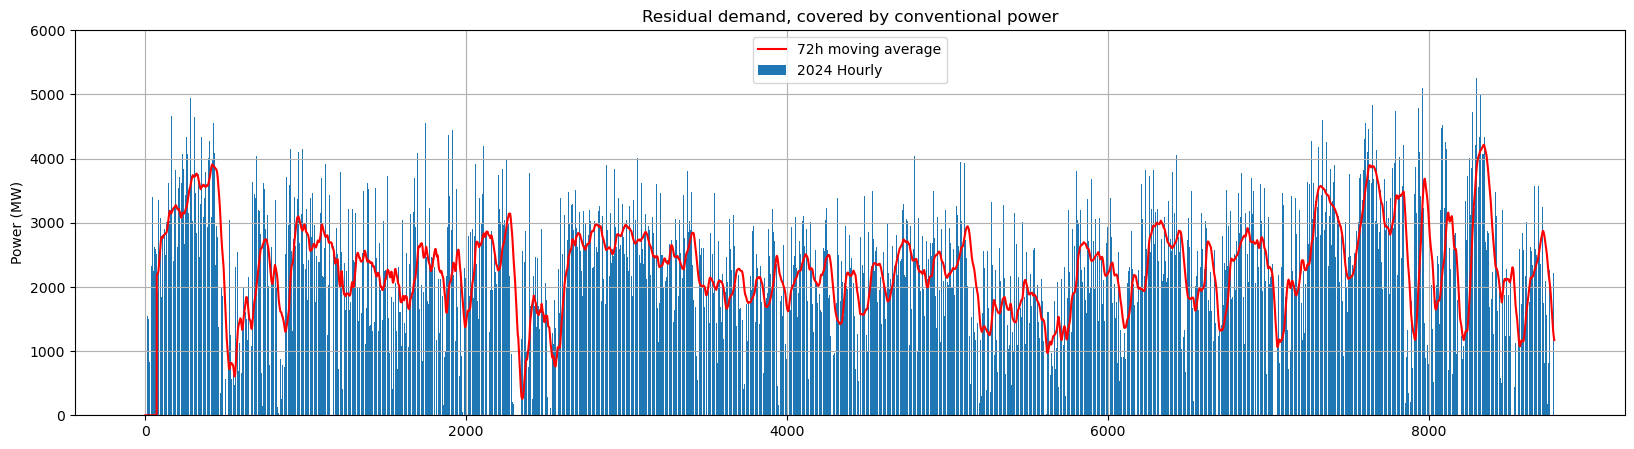

In [1814]:
plt.figure(figsize=(20, 5))
plt.bar(DF.index, DF['residual'])
plt.plot(DF.index, mvavg_residual, color='red')
plt.grid(True)
plt.title("Residual demand, covered by conventional power")
plt.ylabel("Power (MW)")
plt.legend(['72h moving average', '2024 Hourly'])
plt.ylim([0, 6000])
plt.savefig("residual-demand.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

In [1805]:
print("Maximum residual:", max(DF['residual']), max(DF['residual']) / 6000)
print("Mean residual:", np.mean(DF['residual']), np.mean(DF['residual']) / 6000)
print("Minimum residual:", min(DF['residual']), min(DF['residual']) / 6000)

Maximum residual: 5371.398 0.8952330000000001
Mean residual: 2297.5711946770543 0.3829285324461757
Minimum residual: -1144.7660000000005 -0.19079433333333343


In [1810]:
DF['residual'][DF['residual'] < 0]

Index([ 489,  490,  491,  492,  493,  494,  504,  505,  506,  507,
       ...
       8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772],
      dtype='int64', length=229)

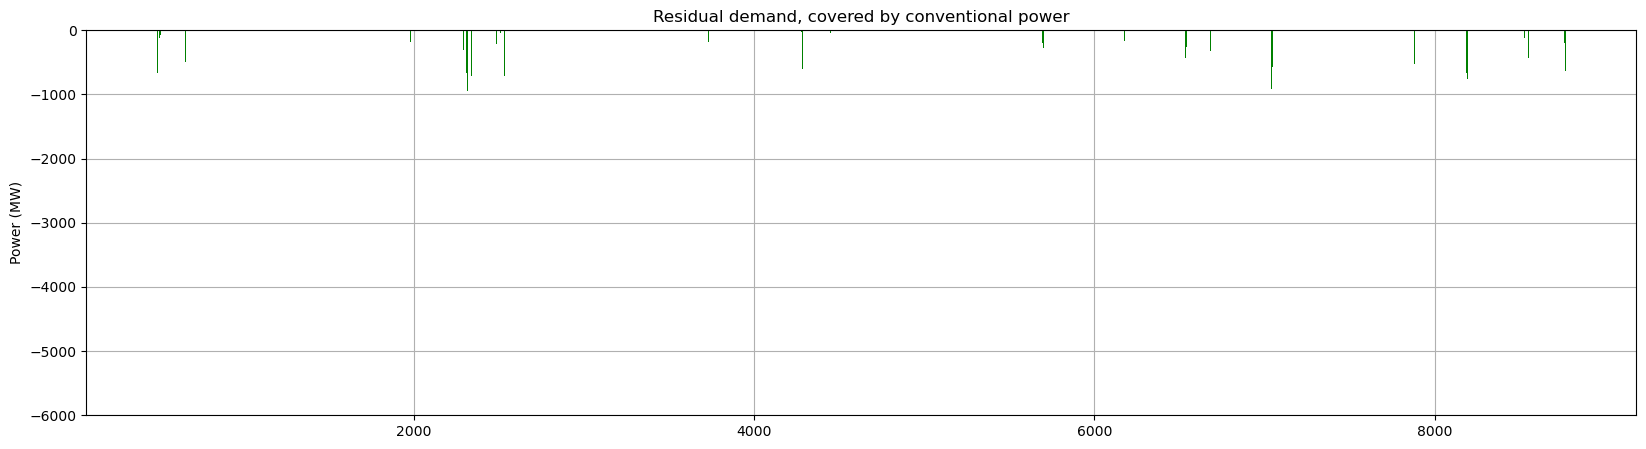

In [1812]:
plt.figure(figsize=(20, 5))
plt.bar(DF['residual'][DF['residual'] < 0].index, DF['residual'][DF['residual'] < 0], color='green', )
plt.grid(True)
plt.title("Residual demand, covered by conventional power")
plt.ylabel("Power (MW)")
plt.ylim([-6000, 0])
plt.savefig("residual-demand-negative.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

### Maximum hour-to-hour change in residual demand
This is a bitch.

First, clean up the data, such that the analysis is carried out only on datapoints which has a previous datapoint one hour apart. All the NaNs have f'ed this up.

In [1843]:
DF['time demand'][0]
DF.index[8000]
i = len(DF)

(DF['time demand'][i] - DF['time demand'][i - 1]) == pd.Timedelta(hours=1)

True

In [1845]:
rc_idx = []
residual_change = []
# Check if diff is one hour
for i in range(1, len(DF)):
    if (DF['time demand'].iloc[i] - DF['time demand'].iloc[i - 1]) == pd.Timedelta(hours=1):
        rc_idx.append(DF.index[i])
        rc = DF['residual'].iloc[i] - DF['residual'].iloc[i-1]
        residual_change.append(rc)

In [1852]:
DF.loc[rc_idx, 'residual change'] = np.array(residual_change)

In [ ]:
maxidx = nanargmax(DF['residual change'])
maxidx

In [1867]:
np.nanmax(DF['residual change'])

907.212

In [1904]:
DF.iloc[maxidx-1:maxidx+1,[0, 1, 3, 5, 6, 7]]

,time demand,demand,wind power,pv power,residual,residual change
8455,2024-12-18 07:00:00,3440.62,2372.592,4.0,1064.028,555.782
8456,2024-12-18 08:00:00,3990.16,1854.920,164.0,1971.24,907.212


In [1875]:
print("Maximum change:", np.nanmax(abs(DF['residual change'])))
print("Maximum upwards change:", np.nanmax(DF['residual change']))
print("Maximum downwards change:", np.nanmin(DF['residual change']))

Maximum change: 1117.4699999999998
Maximum upwards change: 907.212
Maximum downwards change: -1117.4699999999998


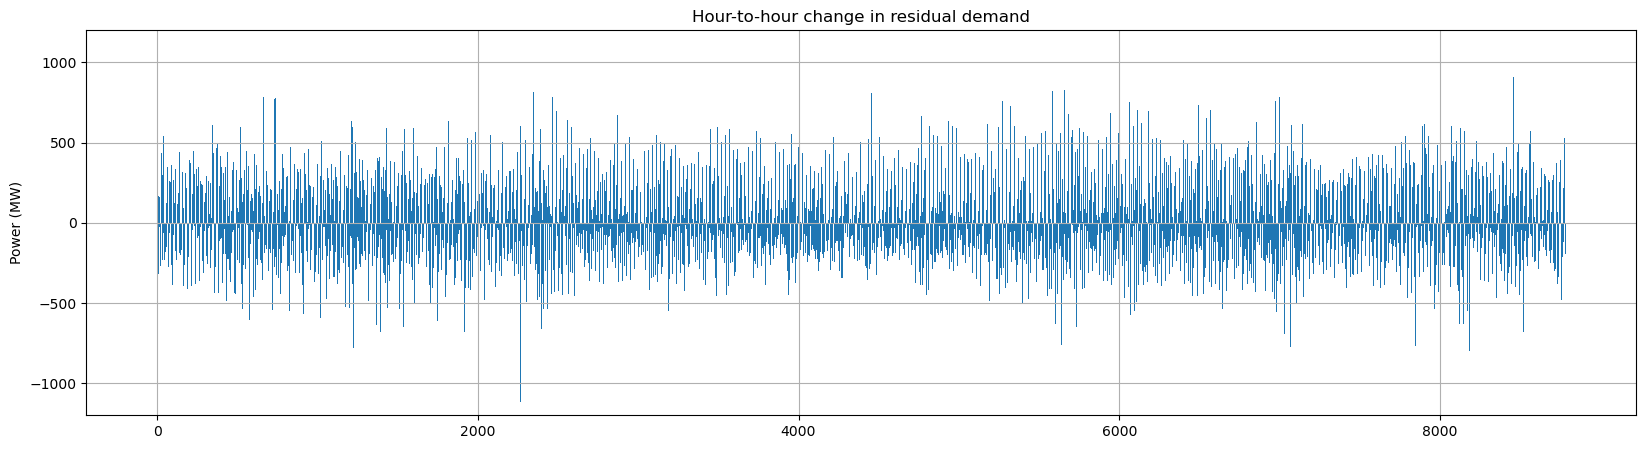

In [1900]:
plt.figure(figsize=(20, 5))
plt.bar(DF['residual change'].index, DF['residual change'], width=5)
plt.grid(True)
plt.title("Hour-to-hour change in residual demand")
plt.ylabel("Power (MW)")
plt.ylim([-1200, 1200])
plt.savefig("hour-2-hour.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')